## Problem Statement

In [3]:
import numpy as np
import pandas as pd

In [5]:
pip install xlrd==2.0.1

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [7]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
file_path = r"E:\DOWNLOAD\Rotten_Tomatoes_Movies3.xls\Rotten_Tomatoes_Movies3.xls"

In [9]:
df = pd.read_excel(io=file_path , engine ='xlrd')

In [13]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [15]:
df.shape

(16638, 16)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [19]:
# Check for Null values
pd.isnull(df).sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

In [21]:
# Impute Missing Values

df['movie_info'].fillna('Unknown',inplace = True)
df['critics_consensus'].fillna('Unknown',inplace = True)
df['directors'].fillna('Unknown' , inplace = True)
df['writers'].fillna('Unknown' , inplace = True)
df['cast'].fillna('Unknown' , inplace = True)
df['studio_name'].fillna('Unknown' ,inplace = True)

In [23]:
# Impute Missing Values Mean ,  Median ,  Mode
# NUMERICAL VALUES

df['runtime_in_minutes'].fillna(df['runtime_in_minutes'].median() , inplace = True)
df['audience_rating'].fillna(df['audience_rating'].median() , inplace = True)


In [25]:
# impute with a PLACEHOLDER Date
df['in_theaters_date'].fillna(pd.Timestamp('1900-01-01'),inplace = True)
df['on_streaming_date'].fillna(pd.Timestamp('1900-01-01') , inplace = True)

In [27]:
# CATEGORICAL VALUES
df['genre'].fillna(df['genre'].mode() , inplace = True)

In [29]:
# Rechecking Missing values
print(pd.isnull(df).sum())

movie_title            0
movie_info             0
critics_consensus      0
rating                 0
genre                 17
directors              0
writers                0
cast                   0
in_theaters_date       0
on_streaming_date      0
runtime_in_minutes     0
studio_name            0
tomatometer_status     0
tomatometer_rating     0
tomatometer_count      0
audience_rating        0
dtype: int64


In [31]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [33]:
df.describe

<bound method NDFrame.describe of                                              movie_title  \
0      Percy Jackson & the Olympians: The Lightning T...   
1                                            Please Give   
2                                                     10   
3                        12 Angry Men (Twelve Angry Men)   
4                           20,000 Leagues Under The Sea   
...                                                  ...   
16633                                          Zoot Suit   
16634                                           Zootopia   
16635                                    Zorba the Greek   
16636                                               Zulu   
16637                                          Zulu Dawn   

                                              movie_info  \
0      A teenager discovers he's the descendant of a ...   
1      Kate has a lot on her mind. There's the ethics...   
2      Blake Edwards' 10 stars Dudley Moore as George...   
3    

In [35]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,16638,16638,16638.000000,16638.000000,16638.000000,16638.000000
mean,1994-12-04 03:47:32.217814784,2008-08-08 19:08:45.784348928,102.359899,60.466522,56.607104,60.493990
min,1900-01-01 00:00:00,1900-01-01 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1989-04-07 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2005-09-16 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-03-22 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,24.913281,28.587230,66.383800,20.307664


In [37]:
# Exclude date Columns for Numerical Statistics

# Describe Numerical columns
numerical_summary = df.select_dtypes(include = ['number']).describe()
numerical_summary

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,16638.000000,16638.000000,16638.000000,16638.000000
mean,102.359899,60.466522,56.607104,60.493990
std,24.913281,28.587230,66.383800,20.307664
min,1.000000,0.000000,5.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000
50%,99.000000,66.000000,28.000000,62.000000
75%,111.000000,86.000000,76.000000,77.000000
max,2000.000000,100.000000,497.000000,100.000000


In [39]:
# Analyze DateTime Columns

print(f"Min in_theaters_date: {df['in_theaters_date'].min()}")
print(f"Max in_theaters_date: {df['in_theaters_date'].max()}")
print()
print(f"Min on_streaming_date: {df['on_streaming_date'].min()}")
print(f"Max on_streaming_date: {df['on_streaming_date'].max()}")

Min in_theaters_date: 1900-01-01 00:00:00
Max in_theaters_date: 2019-12-07 00:00:00

Min on_streaming_date: 1900-01-01 00:00:00
Max on_streaming_date: 2019-11-01 00:00:00


In [41]:
# Count the number of movies un each Genre
genre_counts = df['genre'].value_counts()
genre_counts

genre
Drama                                                                                       1727
Comedy                                                                                      1202
Comedy, Drama                                                                                819
Drama, Mystery & Suspense                                                                    683
Art House & International, Drama                                                             571
                                                                                            ... 
Action & Adventure, Art House & International, Cult Movies, Drama                              1
Animation, Art House & International, Drama, Science Fiction & Fantasy, Special Interest       1
Drama, Kids & Family, Science Fiction & Fantasy, Sports & Fitness                              1
Art House & International, Classics, Cult Movies, Horror, Science Fiction & Fantasy            1
Animation, Drama, Romanc

In [43]:
# Calculate the Mean audience_rating for each genre
genre_avg_rating = df.groupby('genre')['audience_rating'].mean()
genre_avg_rating

genre
Action & Adventure                                                                                    46.964824
Action & Adventure, Animation                                                                         76.941176
Action & Adventure, Animation, Anime & Manga, Art House & International                               58.000000
Action & Adventure, Animation, Anime & Manga, Art House & International, Science Fiction & Fantasy    74.000000
Action & Adventure, Animation, Anime & Manga, Drama                                                   38.000000
                                                                                                        ...    
Science Fiction & Fantasy, Special Interest                                                           85.000000
Science Fiction & Fantasy, Western                                                                    69.000000
Special Interest                                                                                  

In [45]:
# count the number of movies for each rating
rating_counts = df['rating'].value_counts()
rating_counts

rating
R         6136
NR        4862
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: count, dtype: int64

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

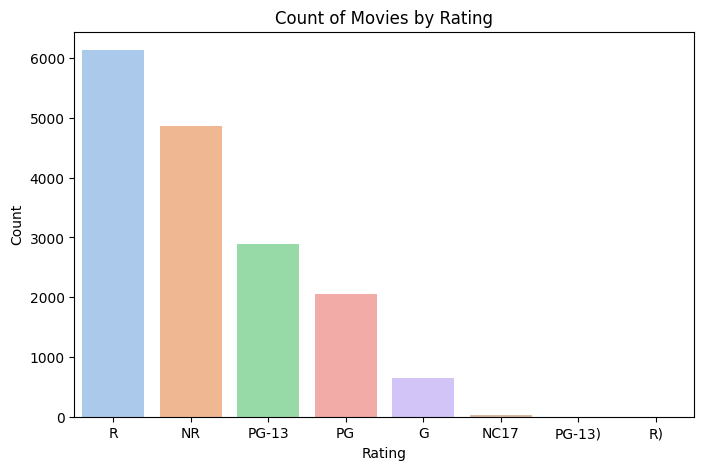

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, palette='pastel', order=df['rating'].value_counts().index)
plt.title('Count of Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [51]:
# calculate the correlation_coefficient
correlation = df[['tomatometer_rating', 'audience_rating']].corr()
print('correlation between tomatometer_rating and audience_rating')
correlation

correlation between tomatometer_rating and audience_rating


,tomatometer_rating,audience_rating
tomatometer_rating,1.000000,0.655457
audience_rating,0.655457,1.000000


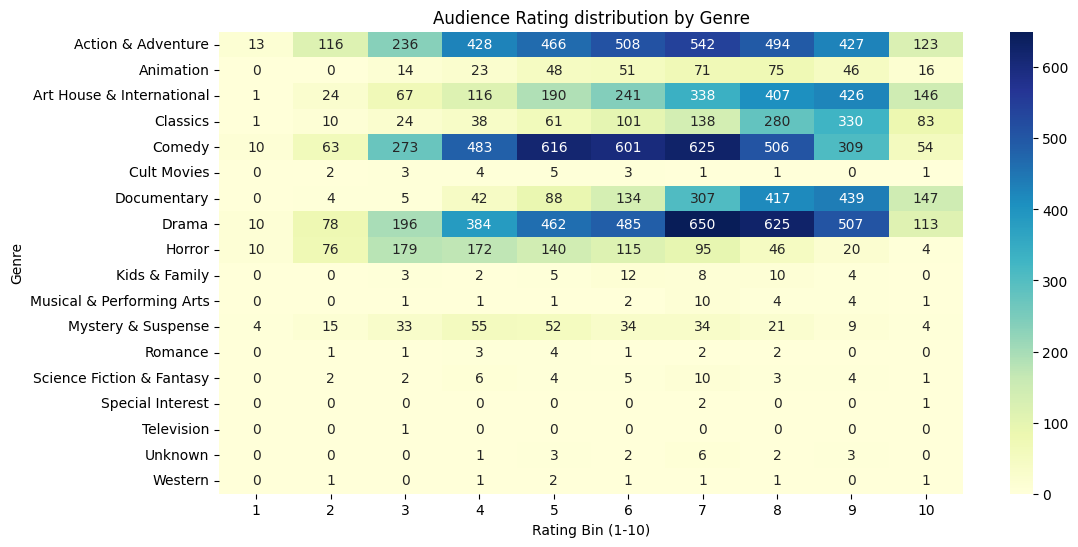

Top genres by average audience rating:
primary_genre
Special Interest             74.666667
Documentary                  73.416298
Classics                     72.042214
Art House & International    67.121677
Musical & Performing Arts    66.375000
Animation                    64.154070
Unknown                      63.705882
Kids & Family                60.477273
Drama                        60.249858
Action & Adventure           57.680286
Science Fiction & Fantasy    55.891892
Comedy                       55.649153
Western                      54.250000
Romance                      47.428571
Mystery & Suspense           46.977011
Cult Movies                  44.150000
Horror                       42.414236
Television                   28.000000
Name: audience_rating, dtype: float64


In [54]:
# Bin audience_rating
df['rating_bin']= pd.cut(df['audience_rating'],bins=10,labels=range(1,11))

# Extract primary genre
df['primary_genre'] = df['genre'].str.split(',').str[0].fillna('Unknown')

# group by Genre and rating_bin
genre_rating_distribution = df.groupby(['primary_genre' , 'rating_bin']).size().unstack(fill_value=0)

# plot the heatmap
plt.figure(figsize=(12, 6))
# plt.figure(figsize=(12,6))
sns.heatmap(genre_rating_distribution, annot=True, cmap='YlGnBu',fmt='d')
plt.title('Audience Rating distribution by Genre')
plt.xlabel('Rating Bin (1-10)')
plt.ylabel('Genre')
plt.show()

# Calculate and sort average audience rating
genre_avg_rating = df.groupby('primary_genre')['audience_rating'].mean()
popular_genres = genre_avg_rating.sort_values(ascending=False)

print("Top genres by average audience rating:")
print(popular_genres)

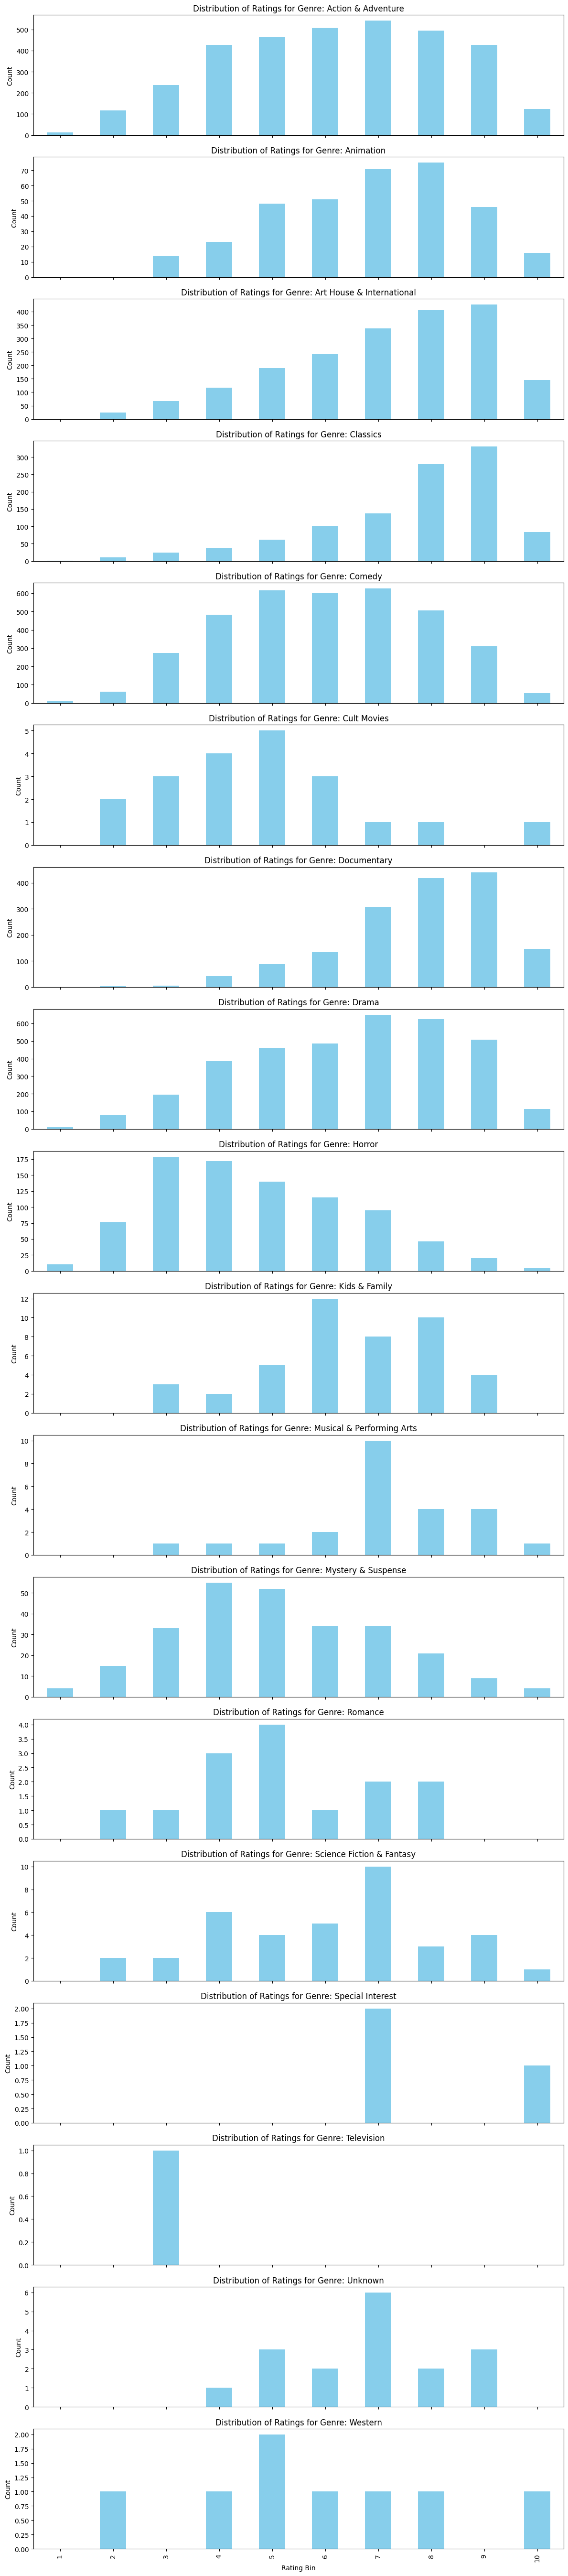

In [56]:
# Create bins for audience_rating
df['rating_bin'] = pd.cut(df['audience_rating'], bins=10, labels=range(1, 11))

# Extract primary genre
df['primary_genre'] = df['genre'].str.split(',').str[0].fillna('Unknown')

# Group by genre and rating_bin
genre_rating_distribution = df.groupby(['primary_genre', 'rating_bin']).size().unstack(fill_value=0)

# Plot subplots for each genre
num_genres = len(genre_rating_distribution)
fig, axes = plt.subplots(nrows=num_genres, ncols=1, figsize=(12, 3 * num_genres), sharex=True)

for idx, genre in enumerate(genre_rating_distribution.index):
    ax = axes[idx] if num_genres > 1 else axes  # Handle single subplot
    genre_rating_distribution.loc[genre].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Distribution of Ratings for Genre: {genre}')
    ax.set_ylabel('Count')
    ax.set_xlabel('Rating Bin')

# Adjust layout
plt.tight_layout()
plt.show()


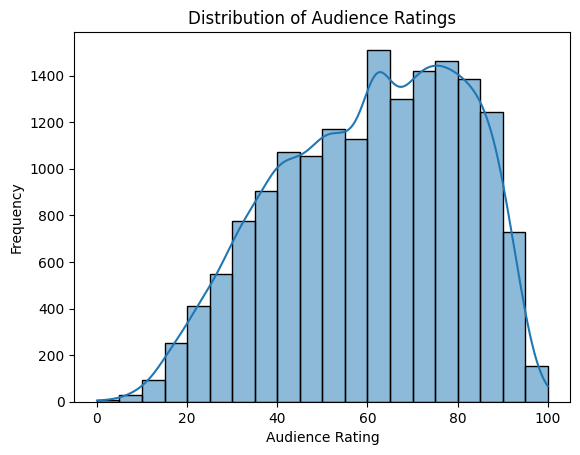

In [58]:
# Drop missing values in 'audience_rating'
import seaborn as sns
import matplotlib.pyplot as plt

df_cleaned = df.dropna(subset=['audience_rating'])

# Plot histogram
sns.histplot(df_cleaned['audience_rating'], kde=True, bins=20)
plt.title('Distribution of Audience Ratings')
plt.xlabel('Audience Rating')
plt.ylabel('Frequency')
plt.show()

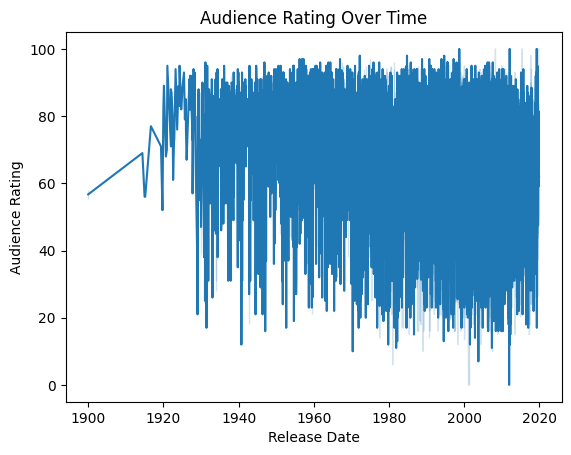

In [60]:
df_cleaned = df_cleaned.sort_values(by='in_theaters_date')
sns.lineplot(x='in_theaters_date', y='audience_rating', data=df_cleaned)
plt.title('Audience Rating Over Time')
plt.xlabel('Release Date')
plt.ylabel('Audience Rating')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
# Select features and target
X = df[['runtime_in_minutes', 'tomatometer_rating', 'audience_rating']]
y = df['rating_bin']

In [63]:
# Drop rows with NaN in target variable
X = X.dropna()
y = y.loc[X.index]

In [64]:
# Encode target variable
y = y.astype(int)  # Ensure target is numerical

In [65]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
# Train Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [68]:
# Predict on test set
y_pred = log_reg.predict(X_test)

In [69]:
# Evaluate model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[  0   8   0   0   0   0   0   0   0   0]
 [  0  51  32   0   0   0   0   0   0   0]
 [  0   0 186  16   0   0   0   0   0   0]
 [  0   0   0 334   6   0   0   0   0   0]
 [  0   0   0   2 430   7   0   0   0   0]
 [  0   0   0   0   1 413  33   0   0   0]
 [  0   0   0   0   0   0 568   8   0   0]
 [  0   0   0   0   0   0   8 590   3   0]
 [  0   0   0   0   0   0   0   8 493   0]
 [  0   0   0   0   0   0   0   0  40  91]]

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.86      0.61      0.72        83
           3       0.85      0.92      0.89       202
           4       0.95      0.98      0.97       340
           5       0.98      0.98      0.98       439
           6       0.98      0.92      0.95       447
           7       0.93      0.99      0.96       576
           8       0.97      0.98      0.98       601
           9       0.92      0.98      0

C:\Users\maury\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maury\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maury\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)